In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 먼저 데이터를 불러옵니다.
train_data = pd.read_csv('train.csv')

In [3]:
# 데이터에 어떤 속성이 어떻게 표시되고 있는지 확인. 습관처럼 해주세요.
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 2. 데이터의 크기 확인.. 얘도 습관처럼 해주세요
train_data.shape

(1460, 81)

In [5]:
# 분석할 feature들을 선택합니다.
# iloc, loc 무엇을 사용하든 상관 없습니다. 
# 저는 loc이 직관적이서 얘를 좋아합니다..

preprocess = train_data.loc[:, ['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1','BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars']]

In [6]:
preprocess

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageCars
0,60,65.0,7,5,2003,2003,706,0,856,854,8,2
1,20,80.0,6,8,1976,1976,978,0,1262,0,6,2
2,60,68.0,7,5,2001,2002,486,0,920,866,6,2
3,70,60.0,7,5,1915,1970,216,0,961,756,7,3
4,60,84.0,8,5,2000,2000,655,0,1145,1053,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,6,5,1999,2000,0,0,953,694,7,2
1456,20,85.0,6,6,1978,1988,790,163,2073,0,7,2
1457,70,66.0,7,9,1941,2006,275,0,1188,1152,9,1
1458,20,68.0,5,6,1950,1996,49,1029,1078,0,5,1


In [7]:
# 결측치 확인
preprocess.isnull().sum()

MSSubClass        0
LotFrontage     259
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtFinSF2        0
1stFlrSF          0
2ndFlrSF          0
TotRmsAbvGrd      0
GarageCars        0
dtype: int64

In [8]:
# 결측치 제거
preprocess.fillna(0, inplace = True)

In [9]:
# 결측치가 제거되었음을 확인
preprocess.isnull().sum()

MSSubClass      0
LotFrontage     0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
BsmtFinSF2      0
1stFlrSF        0
2ndFlrSF        0
TotRmsAbvGrd    0
GarageCars      0
dtype: int64

In [10]:
# 공통되는 속성을 합쳐줍니다. 물론 따로 두고 분석을 하셔도 되긴 합니다만 저는 일단 합쳐봤어요.

preprocess['OverallPoint'] = preprocess.loc[:, ['OverallQual', 'OverallCond']].sum(axis = 1)
preprocess['Living_Area'] = preprocess.loc[:,['1stFlrSF', '2ndFlrSF']].sum(axis = 1)
preprocess['Fin_Area'] = preprocess.loc[:,['BsmtFinSF1', 'BsmtFinSF2']].sum(axis = 1)

# 합친 column은 제거합니다.
data = preprocess.drop(columns =['OverallQual', 'OverallCond','1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2'], axis = 1)

# target값 == 우리가 예측하고자 하는 값을 따로 저장해줍니다.
target = train_data.loc[:,'SalePrice']

In [11]:
data

,MSSubClass,LotFrontage,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageCars,OverallPoint,Living_Area,Fin_Area
0,60,65.0,2003,2003,8,2,12,1710,706
1,20,80.0,1976,1976,6,2,14,1262,978
2,60,68.0,2001,2002,6,2,12,1786,486
3,70,60.0,1915,1970,7,3,12,1717,216
4,60,84.0,2000,2000,9,3,13,2198,655
...,...,...,...,...,...,...,...,...,...
1455,60,62.0,1999,2000,7,2,11,1647,0
1456,20,85.0,1978,1988,7,2,12,2073,953
1457,70,66.0,1941,2006,9,1,16,2340,275
1458,20,68.0,1950,1996,5,1,11,1078,1078


In [12]:
print(data.shape, target.shape)

(1460, 9) (1460,)


In [13]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import math
import numpy as np

In [15]:
# 학습할 데이터와 학습된 모델을 평가할 데이터를 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1022, 9) (438, 9) (1022,) (438,)


In [17]:
# 모델을 불러옵니다. 먼저 사용할 모델은 선형회귀모델
# sklearn.linear_model 에 있는 LinearRegression이라는 모델입니다.
model = LinearRegression()

# 모델에 데이터를 fitting해줍니다.
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 테스트할 데이터를 모델에 넣어(선형식에 대입해) 예측값을 계산합니다.
pred = model.predict(x_test)

In [19]:
# 모델의 점수를 출력합니다. R2 score입니다.
# 직관적으로 이해하자면 이 모델은 train 데이터를 사용했을 때 사용한 feature를 이용해 전체의 76% 정도의 집값을 설명할 수 있다는 의미입니다.
# 일반적으로 70점 이상이면 양호한 모델이라고 판단합니다.

print(round(model.score(x_train, y_train), 4) * 100)
print(round(model.score(x_test, y_test), 4) * 100)

75.98
80.54


In [20]:
rmse = math.sqrt(mean_squared_error(y_test, pred)) / len(y_test)

rmse

75.30935515574859

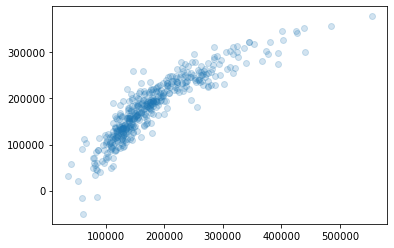

In [21]:
# 예측값과 실제값을 산점도로 plotting 한 결과입니다.
# 만약 정확히 예측했을 경우 y = x 그래프로 나오겠죠?

plt.scatter(y_test, pred, alpha = 0.2)
plt.show()

In [22]:
print(model.coef_)

[-1.90845694e+02  1.75292543e+01  6.32288915e+02  6.14318703e+01
  9.96100906e+02  1.83496086e+04  1.30576194e+04  6.30198393e+01
  2.12448602e+01]


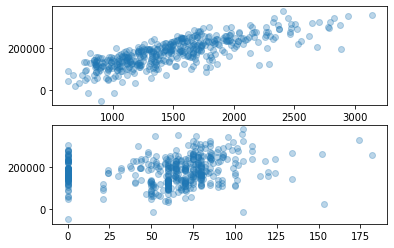

In [23]:
# feature와 target의 상관관계를 그려봅니다.

plt.subplot(2, 1, 1)# nrows=2, ncols=1, index=1
plt.scatter(x_test['Living_Area'], pred, alpha = 0.3)

plt.subplot(2, 1, 2) # nrows=2, ncols=1, index=2
plt.scatter(x_test['LotFrontage'], pred, alpha = 0.3)

plt.show()

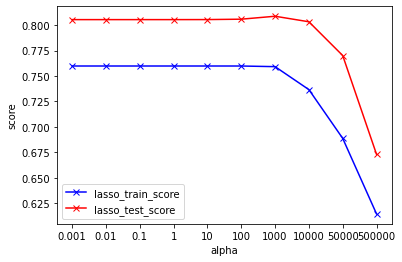

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import math

# 앞서서 배운 Lasso 모델을 살펴봅시다.

# alpha값은 하이퍼파라미터로, 제약조건입니다. 값이 커질수록 제약조건이 강력해집니다.
# 즉 모델이 더 단순화되는겁니다.

# 너무 크면 underfitting이 일어납니다.
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 50000, 500000]

# 각종 지표를 저장할 리스트를 선언합니다. 빈 리스트에 append할 예정입니다.
lasso_train_score = []
lasso_test_score = []
lasso_RMSE_list = []
lasso_coef_sum = []

for i in alpha:
    #먼저 새로운 모델을 alpha값을 이용해 선언합니다.
    model2 = Lasso(alpha = i, max_iter = 1000).fit(x_train, y_train)
    
    pred2 = model2.predict(x_test)
    
    # 위에서 선언한 빈 리스트에 지표를 저장합니다.
    lasso_train_score.append(model2.score(x_train, y_train))
    lasso_test_score.append(model2.score(x_test, y_test))
    lasso_RMSE_list.append(math.sqrt(mean_squared_error(y_test, pred2)))
    lasso_coef_sum.append(model2.coef_.sum())
# print(np.sum(model.coef_))

# score를 plotting해 봅시다!
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(alpha)), lasso_train_score, '-x', c='blue', label="lasso_train_score")
ax.plot(range(len(alpha)), lasso_test_score, '-x', c='red', label="lasso_test_score")
plt.xticks(range(len(alpha)), alpha)
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


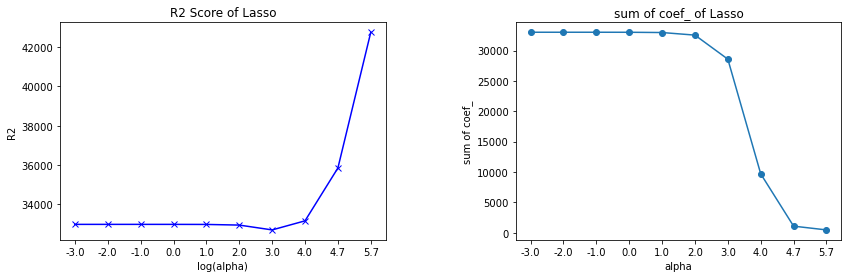

In [25]:
import math
fig, sub = plt.subplots(1, 2, figsize = (14,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sub[0].plot(range(len(alpha)), lasso_RMSE_list, '-x', color = 'blue')
sub[0].set_xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
sub[0].set_xlabel('log(alpha)')
sub[0].set_ylabel('R2')
sub[0].set_title('R2 Score of Lasso')

sub[1].plot(range(len(alpha)), lasso_coef_sum, '-o')
sub[1].set_xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
sub[1].set_xlabel('alpha')
sub[1].set_ylabel('sum of coef_')
sub[1].set_title('sum of coef_ of Lasso')


plt.show()

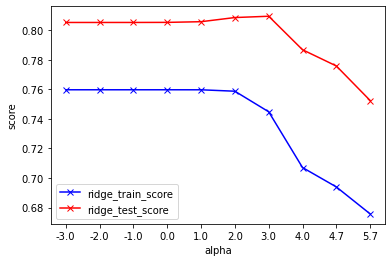

In [26]:

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 50000, 500000]
ridge_train_score = []
ridge_test_score = []
ridge_RMSE_list = []
ridge_coef_sum = []

for i in alpha:
    model3 = Ridge(alpha = i, max_iter = 1000).fit(x_train, y_train)

    pred3 = model3.predict(x_test)
    ridge_train_score.append(model3.score(x_train, y_train))
    ridge_test_score.append(model3.score(x_test, y_test))
    
    ridge_RMSE_list.append(math.sqrt(mean_squared_error(y_test, pred3)))
    ridge_coef_sum.append(model3.coef_.sum())
# print(np.sum(model.coef_))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(alpha)), ridge_train_score, '-x', c='blue', label="ridge_train_score")
ax.plot(range(len(alpha)), ridge_test_score, '-x', c='red', label="ridge_test_score")
plt.xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


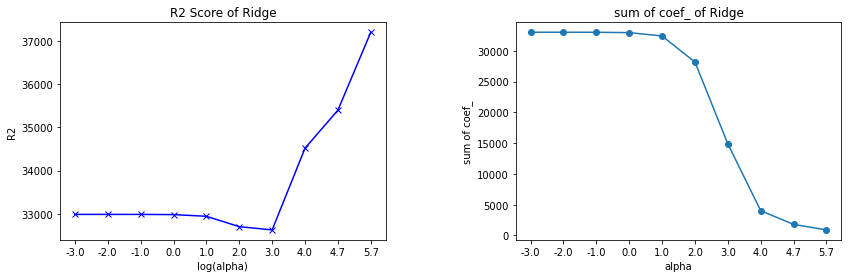

In [27]:
import math
fig, sub = plt.subplots(1, 2, figsize = (14,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sub[0].plot(range(len(alpha)), ridge_RMSE_list, '-x', color = 'blue')
sub[0].set_xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
sub[0].set_xlabel('log(alpha)')
sub[0].set_ylabel('R2')
sub[0].set_title('R2 Score of Ridge')

sub[1].plot(range(len(alpha)), ridge_coef_sum, '-o')
sub[1].set_xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
sub[1].set_xlabel('alpha')
sub[1].set_ylabel('sum of coef_')
sub[1].set_title('sum of coef_ of Ridge')


plt.show()

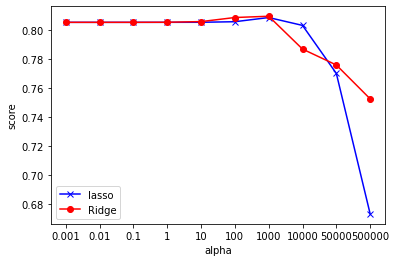

In [28]:
# ridge와 lasso를 비교해 봅시다.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(alpha)), lasso_test_score, '-x', c='blue', label="lasso")
ax.plot(range(len(alpha)), ridge_test_score, '-o', c='red', label="Ridge")
plt.xticks(range(len(alpha)), alpha)
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


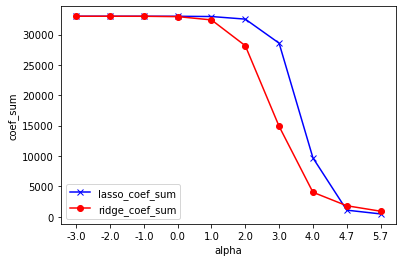

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(alpha)), lasso_coef_sum, '-x', c='blue', label="lasso_coef_sum")
ax.plot(range(len(alpha)), ridge_coef_sum, '-o', c='red', label="ridge_coef_sum")
plt.xticks(range(len(alpha)), [round(x, 2) for x in np.log10(alpha)])
plt.xlabel('alpha')
plt.ylabel('coef_sum')
plt.legend(loc='lower left')
plt.show()

In [30]:
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])

# ax.scatter(x_test['LotFrontage'], x_test['OverallPoint'], alpha = 0.3)

# plt.ylim(0,160)
# plt.xlim(0,160)

# plt.show()